## Table of Contents
* [Understanding Kullback-Leibler Divergence and Cross Entropy](#cross_entropy)
* [AUC](#auc)
* [Inverted residual block](#inverted_residual_block)
* [MobileNetV2](#mobilenetv2)

### Understanding Kullback-Leibler Divergence and Cross Entropy <a id="cross_entropy"></a>

#### Kullback-Leibler Divergence

Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. It is often used in information theory, statistics, and machine learning to quantify the difference between two probability distributions.

**Mathematical Definition**

Given two probability distributions $P$ (true distribution) and $Q$ (approximate distribution), the KL divergence from $Q$ to $P$ is defined as:

$$
D_{KL}(P \parallel Q) = \sum_{x \in \mathcal{X}} P(x) \log \frac{P(x)}{Q(x)}
$$

For continuous distributions, the sum is replaced by an integral:

$$
D_{KL}(P \parallel Q) = \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)} \, dx
$$

Here:
- $P(x)$ and $Q(x)$ are the probability mass functions (for discrete distributions) or probability density functions (for continuous distributions).
- $\mathcal{X}$ is the set of all possible events.

**Interpretation**

- $D_{KL}(P \parallel Q)$ measures the amount of information lost when $Q$ is used to approximate $P$.
- It is not symmetric: $D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P)$.

#### Cross Entropy

Cross entropy is a measure of the difference between two probability distributions for a given set of events. It quantifies the average number of bits needed to identify an event from a set of possibilities if a coding scheme is used based on a given probability distribution $Q$, rather than the true distribution $P$.

**Mathematical Definition**

For discrete distributions $P$ and $Q$, the cross entropy is defined as:

$$
H(P, Q) = -\sum_{x \in \mathcal{X}} P(x) \log Q(x)
$$

For continuous distributions:

$$
H(P, Q) = -\int_{-\infty}^{\infty} p(x) \log q(x) \, dx
$$

### Relationship Between KL Divergence and Cross Entropy

The KL divergence can be expressed in terms of entropy and cross entropy. The entropy $H(P)$ of a distribution $P$ is given by:

$$
H(P) = -\sum_{x \in \mathcal{X}} P(x) \log P(x)
$$

For continuous distributions:

$$
H(P) = -\int_{-\infty}^{\infty} p(x) \log p(x) \, dx
$$

The cross entropy $H(P, Q)$ can be decomposed as:

$$
H(P, Q) = H(P) + D_{KL}(P \parallel Q)
$$

Thus, the KL divergence can be interpreted as the difference between the cross entropy and the entropy of $P$:

$$
D_{KL}(P \parallel Q) = H(P, Q) - H(P)
$$

This equation highlights that KL divergence measures the extra amount of information (in bits) required to encode the distribution $P$ using the distribution $Q$ compared to using the optimal code based on $P$.

### Example in Context

Suppose you have a true probability distribution $P$ and you are using an approximate distribution $Q$. If you calculate the cross entropy $H(P, Q)$, it will tell you how many bits on average you need to encode samples from $P$ using the distribution $Q$.

The entropy $H(P)$ tells you how many bits are needed if you use the true distribution $P$.

The KL divergence $D_{KL}(P \parallel Q)$ then gives you the inefficiency introduced by using $Q$ instead of $P$. It essentially quantifies how much more difficult it is to represent the true distribution $P$ using the approximate distribution $Q$.

### Visual Representation

To illustrate, consider the following:

- $P$ is the true distribution of data.
- $Q$ is a model's predicted distribution.

When you use $Q$ to approximate $P$, the KL divergence provides a way to measure how "wrong" $Q$ is. The lower the KL divergence, the closer $Q$ is to $P$.

### Summary

- **KL Divergence** measures the difference between two probability distributions.
- **Cross Entropy** measures the average number of bits needed to encode data from a true distribution using an approximate distribution.
- **Relation**: KL divergence is the difference between the cross entropy and the entropy of the true distribution. It provides a measure of inefficiency when using an approximate distribution instead of the true distribution.


### **AUC** <a id="auc"></a>

AUC stands for **Area Under the Curve**. It refers to the area under the Receiver Operating Characteristic (ROC) curve, a graphical representation of the true positive rate (TPR) versus the false positive rate (FPR) at various threshold settings. The AUC metric measures the ability of a classifier to distinguish between classes. Specifically:

- **True Positive Rate (TPR)** or **Recall** or **Sensitivity**: The ratio of correctly predicted positive observations to all actual positives.
  
  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **False Positive Rate (FPR)**: The ratio of incorrectly predicted positive observations to all actual negatives.
  
  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

- **Specificity**: Specificity measures the proportion of actual negative instances that are correctly identified by the model as negative. It represents the ability of the model to correctly identify negative instances

  $$
  \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} = 1 - \text{FPR}
  $$

  #### Understanding the ROC Curve

- The **ROC curve** plots TPR (on the y-axis) against FPR (on the x-axis) for different classification thresholds. Each point on the curve represents a TPR/FPR pair corresponding to a particular threshold.

- The **AUC** is the area under this curve. AUC can range from 0 to 1:
  - **AUC = 1**: Perfect model, perfectly distinguishes between positive and negative classes.
  - **AUC = 0.5**: Model has no discrimination capability (equivalent to random guessing).
  - **AUC < 0.5**: Model is worse than random guessing (indicating it might be consistently predicting the opposite class).

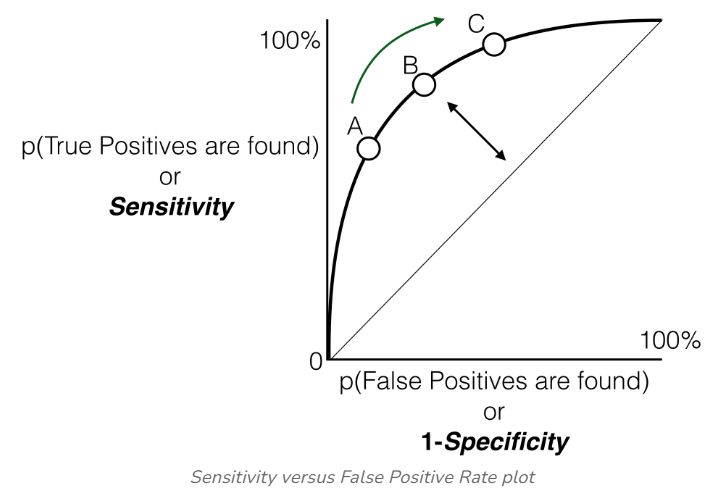

#### Sensitivity and Specificity:

- **Inverse Relationship:** Sensitivity and specificity have an inverse relationship. When one increases, the other tends to decrease. This reflects the inherent trade-off between true positive and true negative rates.
- **Tuning via Threshold:** By adjusting the threshold value, we can control the balance between sensitivity and specificity. Lower thresholds lead to higher sensitivity (more true positives) at the expense of specificity (more false positives). Conversely, raising the threshold boosts specificity (fewer false positives) but sacrifices sensitivity (more false negatives).
- FPR and Specificity Connection: False Positive Rate (FPR) is simply the complement of specificity (FPR = 1 – specificity). This signifies the direct relationship between them: higher specificity translates to lower FPR, and vice versa.
- FPR Changes with TPR: Similarly, as you observed, the True Positive Rate (TPR) and FPR are also linked. An increase in TPR (more true positives) generally leads to a rise in FPR (more false positives). Conversely, a drop in TPR (fewer true positives) results in a decline in FPR (fewer false positives)

#### What AUC actually means
An AUC of 0.75 would actually mean that let’s say we take two data points belonging to separate classes then there is a 75% chance the model would be able to segregate them or rank order them correctly i.e positive point has a higher prediction probability than the negative class. (assuming a higher prediction probability means the point would ideally belong to the positive class).

| Index | Class | Probability |
|-------|-------|-------------|
| P1    | 1     | 0.95        |
| P2    | 1     | 0.90        |
| P3    | 0     | 0.85        |
| P4    | 0     | 0.81        |
| P5    | 1     | 0.78        |
| P6    | 0     | 0.70        |


Here we have 6 points where P1, P2, and P5 belong to class 1 and P3, P4, and P6 belong to class 0 and we’re corresponding predicted probabilities in the Probability column, as we said if we take two points belonging to separate classes then what is the probability that model rank orders them correctly.

We will take all possible pairs such that one point belongs to class 1 and the other belongs to class 0, we will have a total of 9 such pairs below are all of these 9 possible pairs.

| Pair   | isCorrect |
|--------|-----------|
| (P1,P3) | True      |
| (P1,P4) | True      |
| (P1,P6) | True      |
| (P2,P3) | True      |
| (P2,P4) | True      |
| (P2,P6) | True      |
| (P5,P3) | False     |
| (P5,P4) | False     |
| (P5,P6) | True      |

Here column is Correct tells if the mentioned pair is correctly rank-ordered based on the predicted probability i.e class 1 point has a higher probability than class 0 point, in 7 out of these 9 possible pairs class 1 is ranked higher than class 0, or we can say that there is a 77% chance that if you pick a pair of points belonging to separate classes the model would be able to distinguish them correctly. 